In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
df = pd.read_csv('Cars export 2025-02-05 19-38-54.csv')



Accuracy: 79.41%


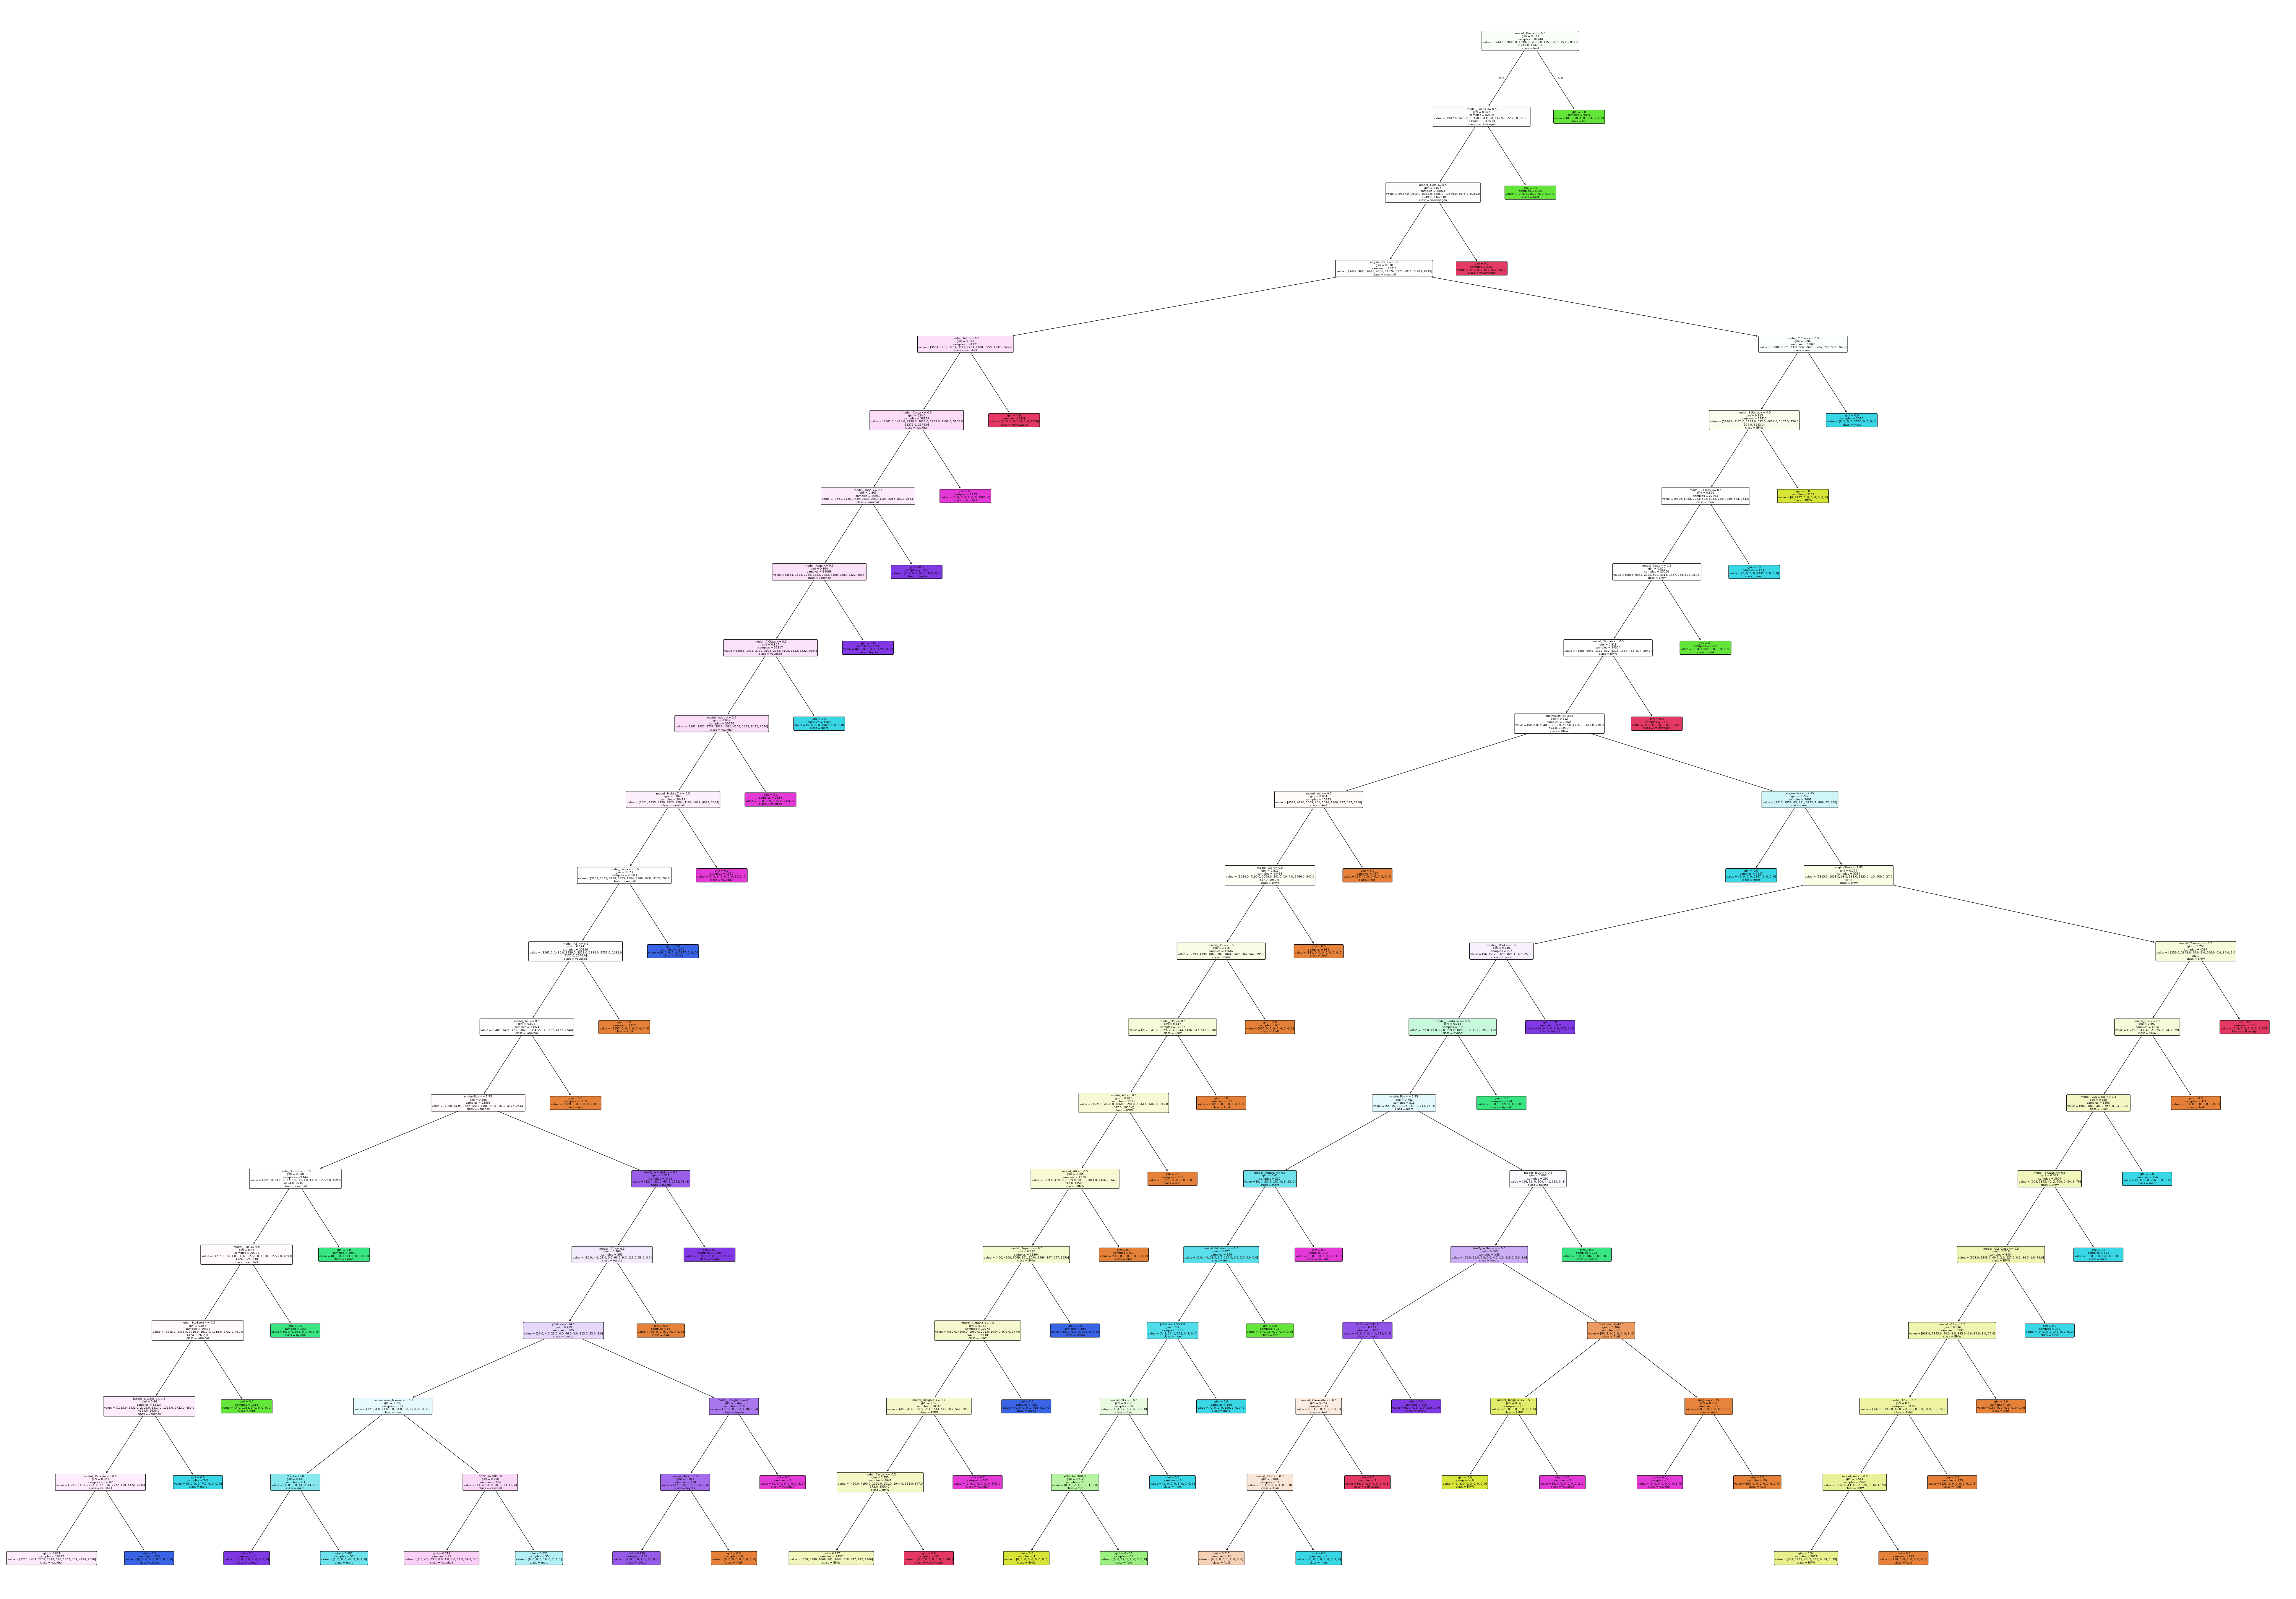

In [15]:

X = df.drop(columns="Manufacturer")
y = df["Manufacturer"]

le = LabelEncoder()
le.fit(y)
X =pd.get_dummies(X,drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=20)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


plt.figure(figsize=(100, 70))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()


Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 57.50%


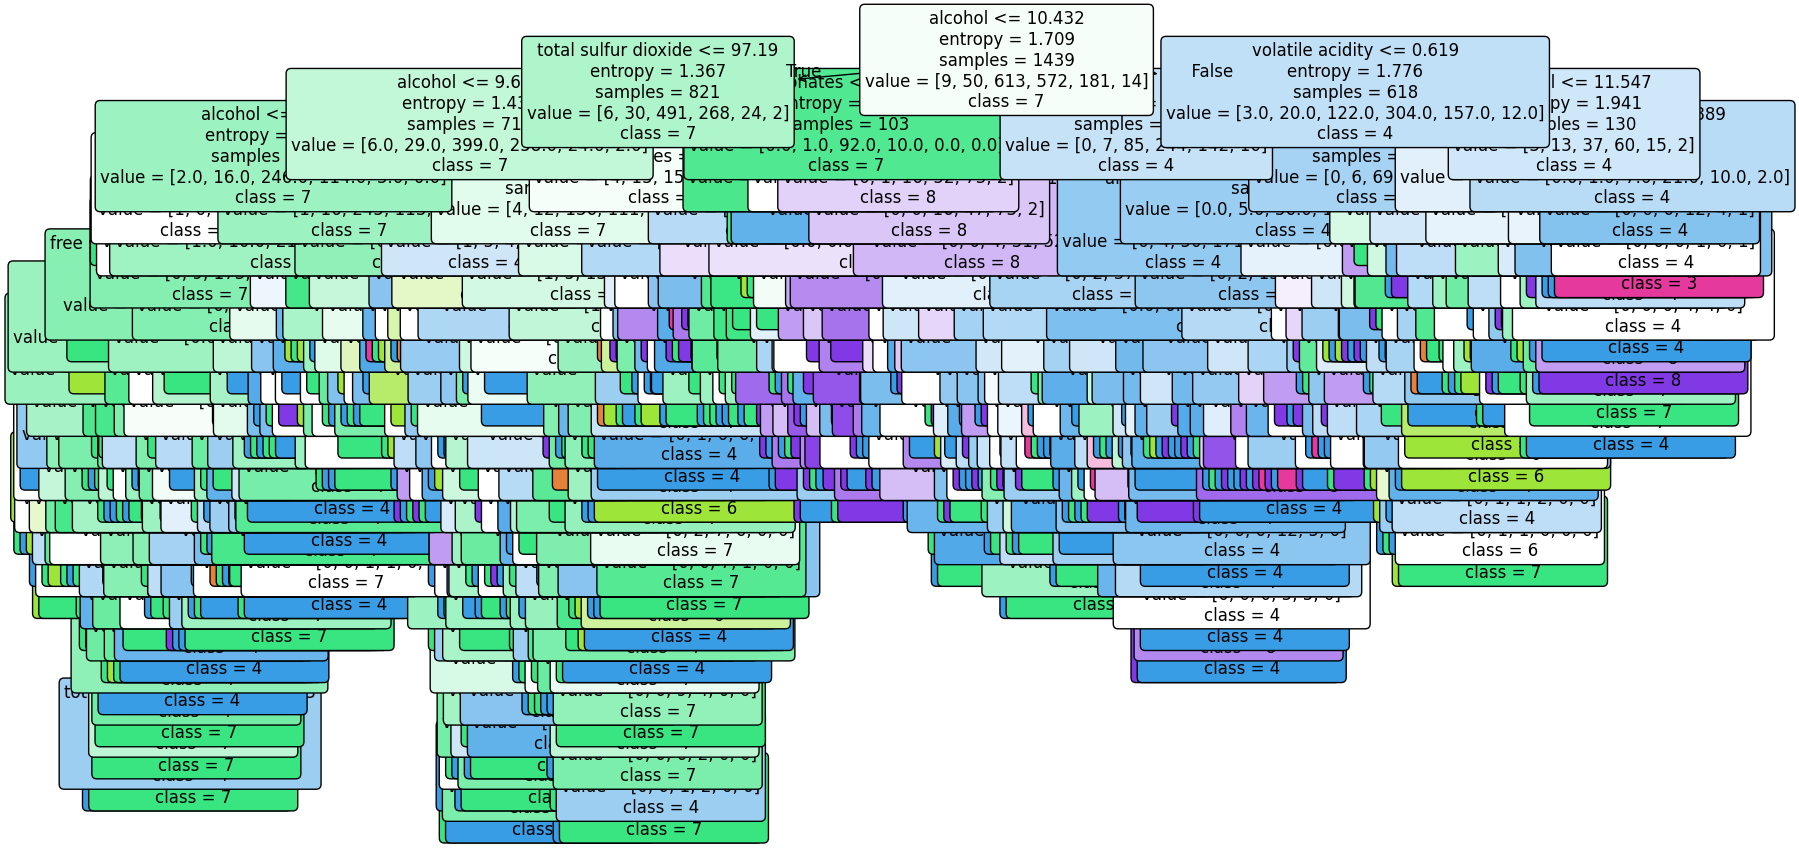

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Cargar el dataset
df = pd.read_csv("winequality-red.csv")

# Dividir en características (X) y objetivo (y)
X = df.drop(columns="quality")
y = df["quality"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo de árbol de decisión con ajuste de pesos de clase
model = DecisionTreeClassifier(random_state=42,criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, splitter='random') 

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados por el GridSearchCV
print(f"Mejores parámetros: {grid_search.best_params_}")

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Graficar el árbol de decisión con los mejores parámetros
plt.figure(figsize=(20, 10))

# Convertir las clases a una lista
class_names = [str(i) for i in y.unique()]

# Graficar el árbol de decisión
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=12)
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.mstats import winsorize

df = pd.read_csv('Cars export 2025-02-05 19-38-54.csv')
df = df.head(10000)

X = df.drop(columns=["Manufacturer", "model", "price", "transmission", "fuelType"])
y = df["price"]

X["mileage"]  =winsorize(X["mileage"],limits=[0.1,0.1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo de Random Forest con 100 árboles
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')

# Visualizar algunas imágenes con sus predicciones
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap="gray")
    ax.set_title(f'Pred: {y_pred[i]}')
    ax.axis("off")
plt.show()


MemoryError: could not allocate 369098752 bytes